Banking Customer Churn Prediction

Load & Prepare Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#Loading data
df = pd.read_csv(r"C:\Users\user\Downloads\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [68]:
# Checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
#Checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [70]:
#Checking the data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [71]:
#checking for high and low cardinality columns
df.select_dtypes("object").nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [4]:
#Dropping columns with high cardinality
df.drop(columns = ["RowNumber"], inplace = True)

In [5]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Explore Data

In [6]:
#Calculating summary statistics to see if there are outliers in the data and if its skewed
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

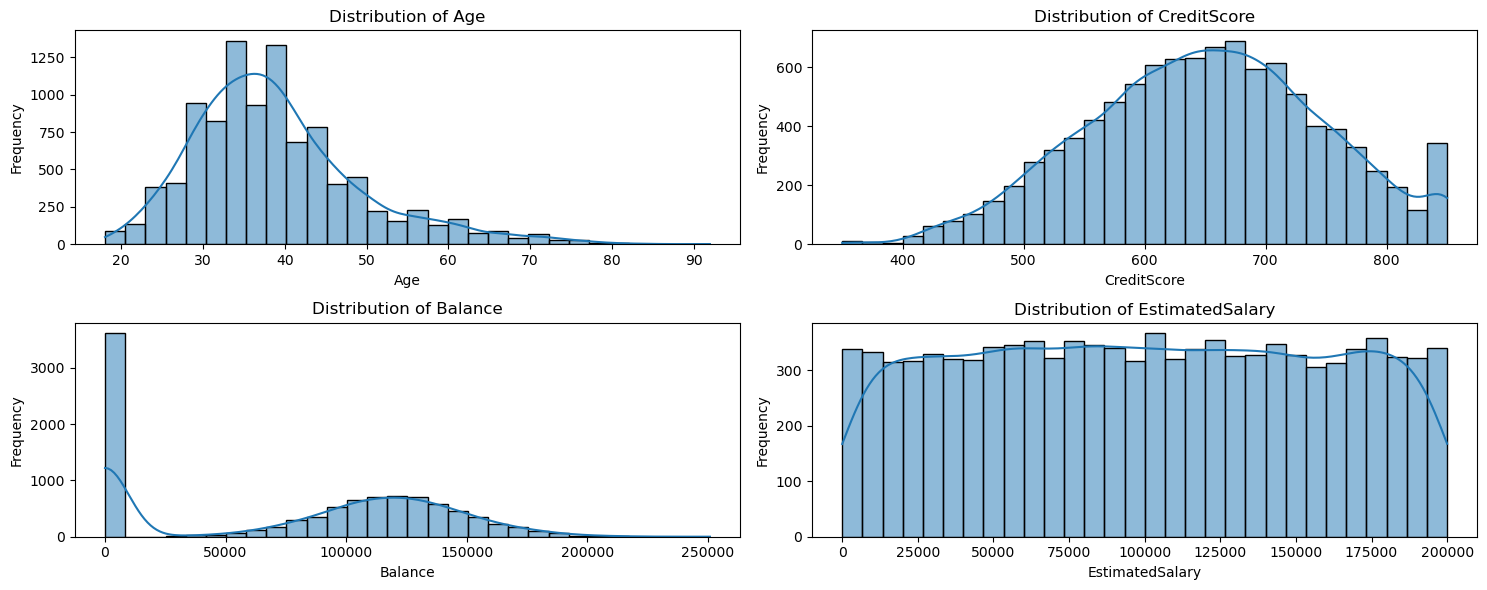

In [7]:
# Histogram distributions for each feature
plt.figure(figsize=(15, 6))
x_value = ["Age", "CreditScore", "Balance", "EstimatedSalary"]
for i, x_value in enumerate(x_value, 1):  
    plt.subplot(2, 2, i) 
    sns.histplot(x=x_value, data=df, bins=30, kde=True)
    plt.title(f"Distribution of {x_value}")  
    plt.xlabel(x_value)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show();

#In terms of Age, the data is skewed to  the right indicating that we have more younger customer, especially from the age of 25-45 and a few customers from the ages 50 and above which are churning

#The Balance curve is evenly distributed with a much lower mean than median and a high number of outliers on the left

#The Credit Score is evenly distributed with the mean neglegibly lower than the median. There is a very small chance of customer churn due to lower credit score

#The data seems symmetrical with the mean neglegibly less than the median and thus slightly skewed to the right.We can therefore assume an even distribution for estimated salary. This mean there is more or less same distibution of customers with higher and lower salaries with a smaller number of customers with lower salaries churning. 

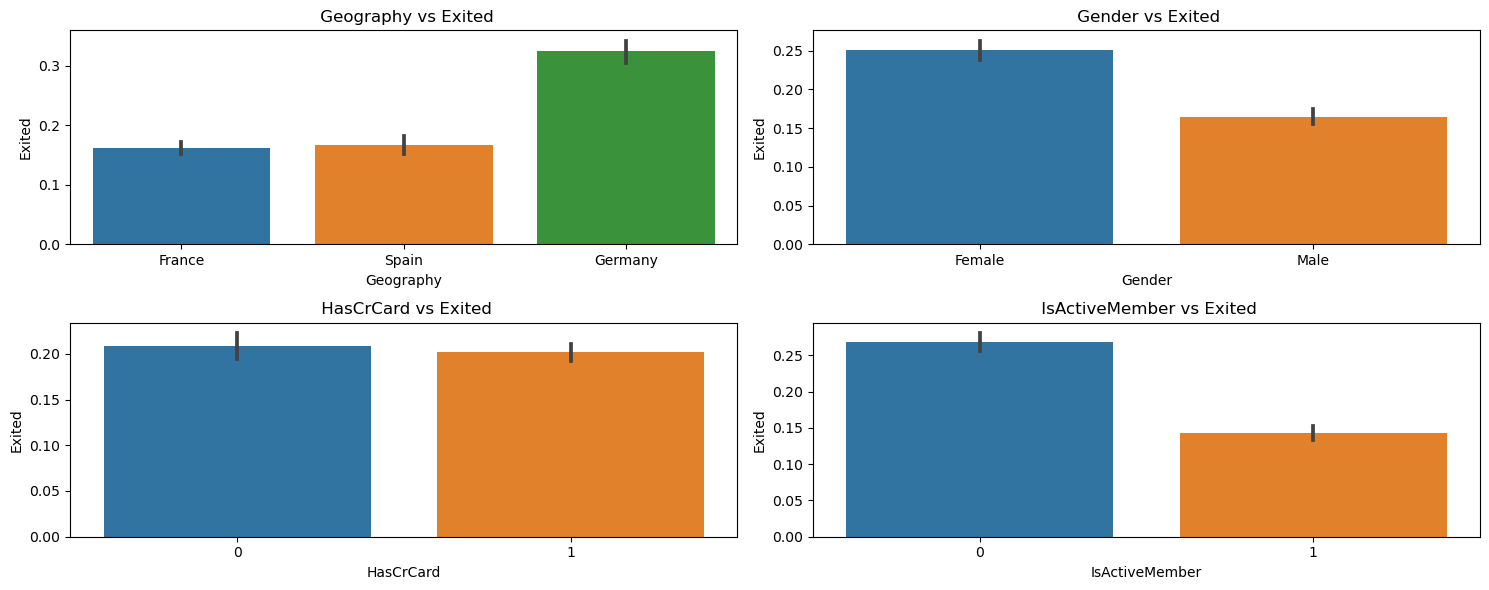

In [150]:
#Customer churn by country, by gender, by credit_card avalilabity and active membership
plt.figure(figsize=(15, 6))
x_value = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

for i, x_value in enumerate(x_value, 1):  
    plt.subplot(2, 2, i) 
    sns.barplot(x=x_value,  y= "Exited", data=df )
    plt.title(f' {x_value}' " vs Exited")  
    plt.xlabel(x_value)
    
plt.tight_layout()
plt.show();

In [4]:
#Number of customers per gender
Gender_of_Customer = df.groupby('Gender')['CustomerId'].size().reset_index()
Gender_of_Customer.columns = ['Gender','Counts']
Gender_of_Customer

,Gender,Counts
0,Female,4543
1,Male,5457


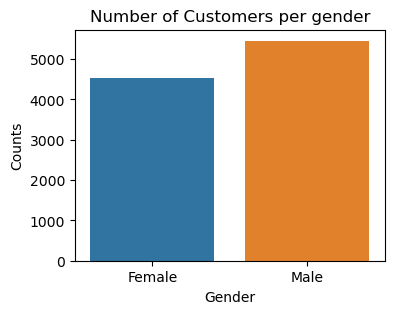

In [5]:
#CustomerId and by gender
plt.figure(figsize=(4, 3))
sns.barplot(x ="Gender", y ="Counts", data =Gender_of_Customer)
plt.xlabel("Gender")
plt.title("Number of Customers per gender")
plt.show();

In [8]:
#Number of customers per country
Country_of_Customer = df.groupby('Geography')['CustomerId'].size().reset_index()
Country_of_Customer.columns = ['Geography','Counts']
Country_of_Customer

,Geography,Counts
0,France,5014
1,Germany,2509
2,Spain,2477


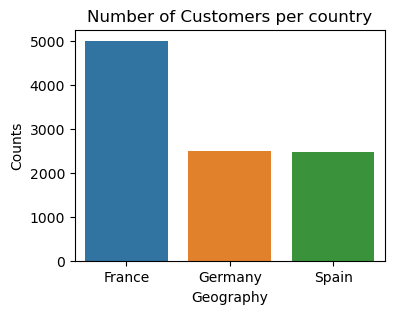

In [9]:
#CustomerId and by country
plt.figure(figsize=(4, 3))
sns.barplot(x ="Geography", y ="Counts", data =Country_of_Customer)
plt.xlabel("Geography")
plt.title("Number of Customers per country")
plt.show();

<Axes: >

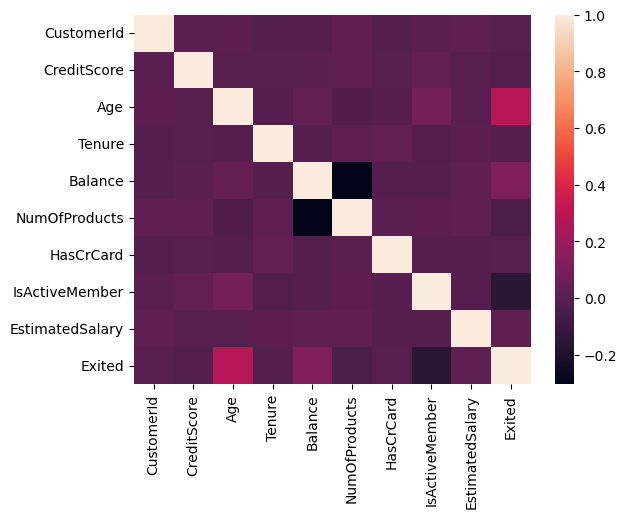

In [104]:
corr = df.select_dtypes("number").corr()
sns.heatmap(corr)

Split Data

In [44]:
#Initialize one hot encode
ohe = OneHotEncoder(drop='first', sparse_output=False)

#Fit and transform data
encoded_data = ohe.fit_transform(df[['Geography', 'Gender']]) 

#Convert to data frame
df_encoded = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['Geography', 'Gender']))

# Concatenate with original DataFrame 
df_final = pd.concat([df, df_encoded], axis=1)


In [46]:
df_final.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [84]:
y= df_final["Exited"]
X =df_final[['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary','Geography_Germany', 'Geography_Spain','Gender_Male']]


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build a Model

In [92]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

Predictions & Accuracy

In [100]:
#Predictions
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

# Accuracy
print("Training data Accuracy:")
print(classification_report(y_train,y_train_prediction))
print("Testing data Accuracy:")
print(classification_report(y_test,y_test_prediction))

#Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_prediction))

Training data Accuracy:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6356
           1       0.38      0.06      0.10      1644

    accuracy                           0.79      8000
   macro avg       0.59      0.52      0.49      8000
weighted avg       0.71      0.79      0.72      8000

Testing data Accuracy:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Confusion Matrix:
[[1573   34]
 [ 365   28]]
